### Writer: Junhyuck Woo
Scope: Create and share a Colab (Jupyter) notebook to analyze transportation data for the LA-freeways dataset using the tools of your choice<br><br>
About the dataset: The LA-freeways dataset contains average traffic speed on freeway segments in LA for 7-9am and 4-7pm (rush hours) on both directions for M-F week days<br>
- 2016: week of May 30 - June 3 and week of June 13-17<br>
- 2017: week of May 29 - June 2 and week of June 12-16<br>
- 2018: week of May 28 - June 1 and week of June 11-15


#### Road Visualization
<img src="https://drive.google.com/uc?export=view&id=12KVB_Lxs6aj-nbWY2pAuSsfN079F42aM">

#### Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Data path

In [2]:
directory = './la-freeways-dataset'
files = ['/I-210A', '/I-210B', '/I-5A', '/I-5B', '/I-405A', '/I-405B']
extension = '.csv'

Read data

In [3]:
data = []
for i in range(3):
    # Road for A
    path = directory + files[i*2] + extension
    data.append(pd.read_csv(path))
    
    # Road For B
    path = directory + files[i*2 + 1] + extension
    data.append(pd.read_csv(path))

The professor told that speed 0 means that there is no input data.<br>
I dropped the examples (objects).

In [4]:
clean_data = data.copy()
avg_speed_list = []
for i in range(len(clean_data)):
    num, avg_speed = 0, 0
    row = clean_data[i]['speed']
    for j in range(len(row)):
        if row[j] == 0:
            clean_data[i] = clean_data[i].drop(j, 0)
        else:
            num += 1
            avg_speed += row[j]
    avg_speed /= num
    avg_speed_list.append(avg_speed)

I-210A 	 55.58288029214336
I-210B 	 52.984962301893844
I-5A 	 54.512311593868304
I-5B 	 39.15364044560975
I-405A 	 50.56768897408627
I-405B 	 45.953568813096396


In [5]:
road_speed = [(avg_speed_list[0] + avg_speed_list[1])/2, 
              (avg_speed_list[2] + avg_speed_list[3])/2, 
              (avg_speed_list[4]+ avg_speed_list[5])/2]

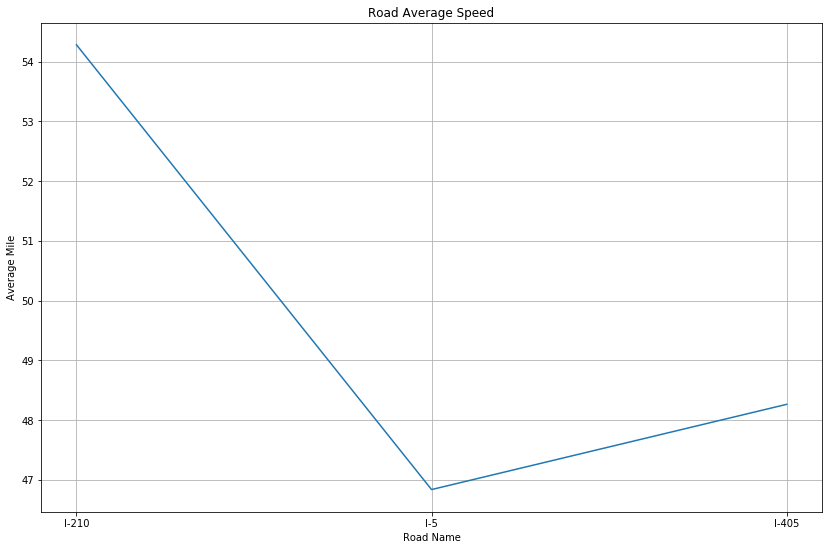

In [6]:
plt.figure(figsize=(14, 9))
plt.plot(['I-210', 'I-5', 'I-405'], road_speed)
plt.xlabel("Road Name")
plt.ylabel("Average Mile")
plt.title("Road Average Speed")
plt.grid()
plt.show()

In I-5, a vehicle could not move fast which means it has the lowest speed.<br>
So, I decided to check more detail.<br>
Actually, I-5 road is a consisted with I-5A and I-5B.<br>

In [20]:
info, selected_data = [], [clean_data[2].copy().reset_index(drop=True), clean_data[3].copy().reset_index(drop=True)]
for i in range(2):
    pm, am, num_pm, num_am = 0, 0, 0, 0
    row = selected_data[i]['time']
    speed = selected_data[i]['speed']
    
    for j in range(len(row)):
        if row[j] == "7-9AM":
            num_am += 1
            am += speed[j]
        else:
            num_pm += 1
            pm += speed[j]
    pm /= num_pm
    am /= num_am
    info.append([max(selected_data[i]['speed']), min(selected_data[i]['speed']), avg_speed_list[i+2], am, pm])

In [43]:
information = pd.DataFrame(info, columns=['Max', 'min', 'Average', 'AM', 'PM'], index=['A','B'])
information

,Max,min,Average,AM,PM
A,70.0,0.928315,54.512312,55.228121,53.797035
B,70.0,2.176000,39.153640,38.578542,39.731499


Text(0.5, 1.0, 'Vehicle speed information')

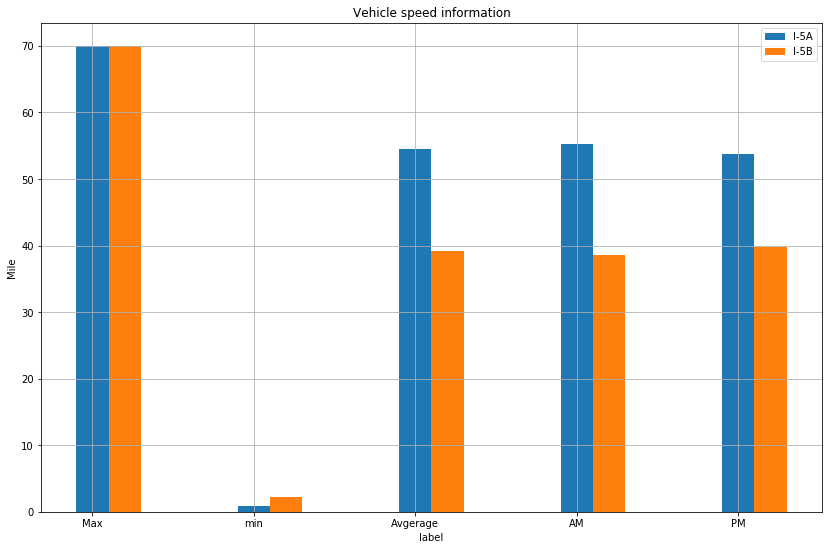

In [73]:
plt.figure(figsize=(14, 9))
plt.bar([i * 2 - 0.2for i in range(len(information.columns))], info[0], label='I-5A', width=0.4)
plt.bar([i * 2 + 0.2 for i in range(len(information.columns))], info[1], label='I-5B', width=0.4)
plt.grid()
plt.xticks([i * 2 - 0.2for i in range(len(information.columns))], ['Max', "min", "Avgerage", "AM", "PM"])
plt.legend()
plt.xlabel("Iabel")
plt.ylabel("Mile")
plt.title("Vehicle speed information")

You can check the I-5B has more serious traffic problems.<br>
Each road has two directions, I will check vehicle speed on the each of direction, N, and S, in I-5B road.<br>

In [105]:
I_50b = selected_data[1].copy()
am, pm, am_n, am_s, pm_n, pm_s, num_n_pm, num_s_pm, num_n_am, num_s_am = [], [], 0, 0, 0, 0,0, 0, 0, 0
time = I_50b['time']
direction = I_50b['direction']
speed = I_50b['speed']
for i in range(len(time)):
    if time[i] == '4-7PM':
        if direction[i] =='N':
            num_n_pm += 1
            pm_n += speed[i]
        else:
            num_s_pm += 1
            pm_s += speed[i]
    else:
        if direction[i] =="N":
            num_n_am += 1
            am_n += speed[i]
        else:
            num_s_am += 1
            am_s += speed[i]
am_n /= num_n_am
am_s /= num_s_am
pm_n /= num_n_pm
pm_s /= num_s_pm

am.append(am_n)
am.append(am_s)
pm.append(pm_n)
pm.append(pm_s)

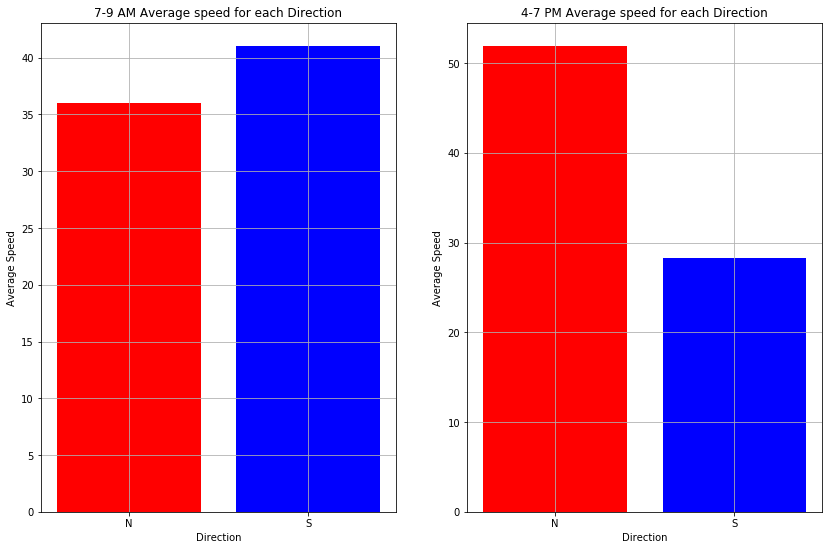

In [111]:
plt.figure(figsize=(14, 9))
sub1 = plt.subplot(1,2,1)
sub1.set_xlabel("Direction")
sub1.set_ylabel("Average Speed")
sub1.set_title("7-9 AM Average speed for each Direction")
sub1.bar(['N', 'S'], [am[0], 0], color='r')
sub1.bar(['N', 'S'], [0,am[1]], color='b')
sub1.grid()
sub2 = plt.subplot(1,2,2)
sub2.set_xlabel("Direction")
sub2.set_ylabel("Average Speed")
sub2.set_title("4-7 PM Average speed for each Direction")
sub2.bar(['N', 'S'], [pm[0],0], color='r')
sub2.bar(['N', 'S'], [0,pm[1]], color='b')
sub2.grid()
plt.show()

In the morning, N and S direction show a similar speed.<br>
I think it is because of commutting time.<br>
However, in the night, it shows huge difference.<br>
I supposed that this is because of the residential district. <br>
So, I tried to check data based on the date.

<img src="https://drive.google.com/uc?export=view&id=17VrvJJeZEzFRoFkmvMo5XLEpRaEzmo4Z">
I utilized "tableau" for visualizing the results.<br>
This data set has only 2 years of contents, so I only visualized that part.

Final result<br>
I thought there are unbalance of the dwelling area, as result, many people are commuting for their works or rest.<br>
It caused the huge traffic. In my opinion, to solve this problem, the city should offer good public transportation system.